In [21]:
%matplotlib inline
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import constants

4500000000.0


In [16]:
Nm    = 100
kappa = 1e-6
alphaT= 3e-5
Ra_c  = 660
cp_m = 1265
M_m  = 4.06e24
S_um = 4*np.pi*6371000**2    #surface area upper mantle
S_lm = 4*np.pi*3480000**2    #surface area upper mantle
f_um = 10
f_lm = 10
fac_um = 0.687
fac_lm = 1.3
beta   = 1/3

def rad_mantle(t):
    h1_u238  = 0.372  #0.9927
    h2_u235  = 0.0164 #0.0072
    h3_Th232 = 0.430 #4.0
    h4_k40   = 0.181 #1.6256
    l1_u238  = 0.155
    l2_u235  = 0.985
    l3_Th232 = 0.0495
    l4_k40   = 0.555
    gamma0   = 0.3
    
    H0 = 10
    H1 = h1_u238  * np.exp(l1_u238*t/1e9)
    H2 = h2_u235  * np.exp(l2_u235*t/1e9)
    H3 = h3_Th232 * np.exp(l3_Th232*t/1e9)
    H4 = h4_k40   * np.exp(l4_k40*t/1e9)

    H = H0 * (H1 + H2 + H3 + H4)
    
    return H

def visc_mantle_korenaga(T):
    etaB_Tref = 2e21 # Pa s
    Tref = 2500      # K
    
    f1 = A / (R*T)
    f2 = A / (R*Tref)
    
    etaB = etaB_Tref * np.exp(f1 - f2)
    return etaB

def visc_mantle_driscoll(T):
    A   = 3e5       # J/mol
    R   = 8.3144598 # J/K/mol
    nu0 = 7e7       # reference viscosity
    nu  = nu0 * np.exp(A/(R*T))
    return nu

def Qu_mantle_driscoll(dTm, nu):
    g_um = 9.8
    k_um = 4.2
    Q = S_um*k_um* (alphaT*g_um/(Ra_c*kappa))**(beta) * (fac_um*dTm)**(beta+1) * (nu)**(-beta)
    
    return Q

def Ql_mantle_driscoll(dTm, nu):
    g_lm = 10.5
    k_lm = 10
    
    Q = S_lm*k_lm* (alphaT*g_lm/(Ra_c*kappa))**(beta) * (fac_lm*dTm)**(beta+1) * (nu)**(-beta)
    
    return Q


In [29]:
nt = int((constants.te-constants.ts)/constants.dt)+1
tim   = np.zeros(nt)
Qrman = np.zeros(nt)
Qcmb  = np.zeros(nt)
Qm    = np.zeros(nt)
Tcmb  = np.zeros(nt)
Tu    = np.zeros(nt)
Tb    = np.zeros(nt)
Tm    = np.zeros(nt)
etab  = np.zeros(nt)

Tcmb_e = 4000
Tcmb_s = 5000
dTcmb = (Tcmb_e-Tcmb_s)/float(nt)

Tg    = 0
Tm[0] = 3000

"""Initial values"""
Qm0  = 36.0
Qc0  = 10.0

for i in range (0,nt):
    
    tim[i]   = constants.te - constants.dt*i
    Qrman[i] = rad_mantle(tim[i])
    Tcmb[i]  = Tcmb_s + dTcmb*float(i)          
        
    T_um = Tm[i] * fac_um
    T_lm = Tm[i] * fac_lm

    nu_um = visc_mantle_driscoll(T_um)  #Get um visc
    nu    = nu_um * f_um
    nu_lm = nu_um * f_lm
    
    dT_um = Tm[i]   - Tg
    dT_lm = Tcmb[i] - Tm[i]   
                   
    Qcmb[i] = Ql_mantle_driscoll(dT_lm, nu_lm)
    Qm[i]   = Qu_mantle_driscoll(dT_um, nu_um)
    
    #print(Qcmb[i]/1e12, Qm[i]/1e12)
        
    dTmdt   = (Qrman[i] - Qm[i] + Qcmb[i])/(cp_m*M_m)      # In k/s
    Tm[i+1] = Tm[i] + dTmdt*constants.dt*constants.secinyr # dt in yrs                 


IndexError: index 901 is out of bounds for axis 0 with size 901

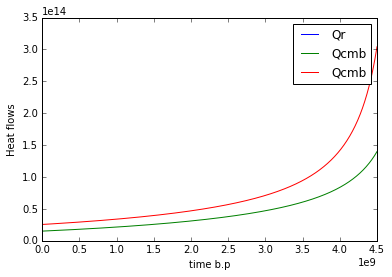

In [30]:
plt.plot(tim,Qrman,label="Qr")
plt.plot(tim,Qcmb,label="Qcmb")
plt.plot(tim,Qm,label="Qcmb")
plt.xlabel('time b.p')
plt.ylabel('Heat flows')
plt.legend()
plt.show()

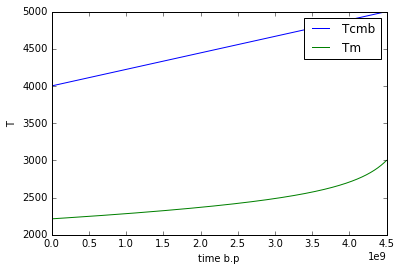

In [31]:
plt.plot(tim,Tcmb,label="Tcmb")
plt.plot(tim,Tm,label="Tm")
plt.xlabel('time b.p')
plt.ylabel('T')
plt.legend()
plt.show()